In [5]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:08<00:00, 20.1MB/s]
100% 163M/163M [00:08<00:00, 21.1MB/s]


In [8]:
from zipfile import ZipFile

dataset = "/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("This Dataset is been Extracted ")

This Dataset is been Extracted 


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [10]:
# import the required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir("/content/data/with_mask")

print(with_mask_files[:3])

['with_mask_3339.jpg', 'with_mask_3373.jpg', 'with_mask_482.jpg']


In [12]:
without_mask_files = os.listdir("/content/data/without_mask")

print(without_mask_files[:3])

['without_mask_765.jpg', 'without_mask_1608.jpg', 'without_mask_1885.jpg']


In [13]:
## checking the number of images present in the folder

print("Number of images with mask are ",len(with_mask_files))

Number of images with mask are  3725


In [14]:
## checking the number of images present in the folder

print("Number of images without mask are ",len(without_mask_files))

Number of images without mask are  3828


creating label for mask and without masked images

"""

mask ==> 1

without mask ==> 0

"""

In [15]:
## lets generate the labels for target class

with_mask_labels = [1] * 3725

without_mask_labels = [0] * 3828

In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
with_mask_labels[:5],without_mask_labels[:5]

([1, 1, 1, 1, 1], [0, 0, 0, 0, 0])

In [18]:
# summing up with mask and without mask

labels = with_mask_labels + without_mask_labels

In [19]:
len(labels)

7553

How to display an images

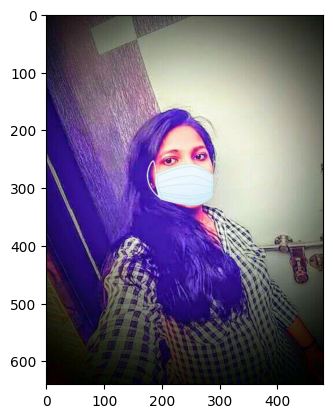

In [20]:
img = mpimg.imread("/content/data/with_mask/with_mask_1053.jpg")
imgplot = plt.imshow(img)
plt.show()

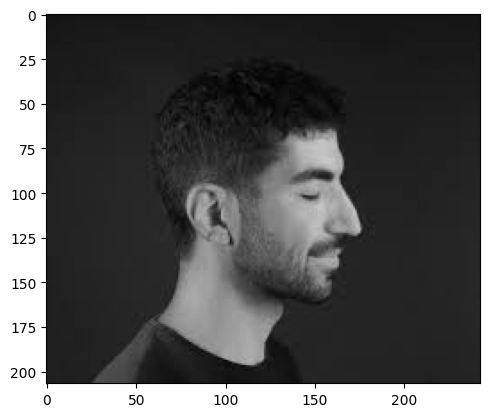

In [21]:
img = mpimg.imread("/content/data/without_mask/without_mask_1051.jpg")
imgplot = plt.imshow(img)
plt.show()

In [22]:
## resize the images
## coverting all the images into numpy array form

data=[]
with_mask_path = '/content/data/with_mask/'

for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file )
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file )
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)




/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
len(data),len(labels)

(7553, 7553)

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
## conerting to array

x = np.array(data)

y = np.array(labels)

In [27]:

# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8, random_state=42)

# Further splitting the training data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, train_size=0.75, random_state=42)  # 75% train, 25% validation

Feature scaling

In [28]:
# Scaling the data
x_train_scaled = x_train / 255.0
x_val_scaled = x_val / 255.0
x_test_scaled = x_test / 255.0

In [29]:
# x_trained_scaled = x_train/255
# x_test_scaled = x_test/255


In [31]:
x_train_scaled[0],x_train_scaled[0].shape

(array([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        ...,
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],
 
        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]),
 (128, 128, 3))

In [32]:
## building an architeture

import tensorflow as tf
from tensorflow import keras

In [34]:
import keras
from keras.callbacks import EarlyStopping
import pickle

In [35]:
# Define your model
model = keras.Sequential()

model.add(keras.layers.Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(128, 128, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))



In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [37]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [59]:

# Train the model with early stopping
history = model.fit(x_train_scaled, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
142/142 [==============================] - 2s 13ms/step - loss: 0.4530 - accuracy: 0.7978 - val_loss: 9.3434 - val_accuracy: 0.8716
Epoch 2/20
142/142 [==============================] - 2s 11ms/step - loss: 0.2251 - accuracy: 0.9113 - val_loss: 10.6238 - val_accuracy: 0.8848
Epoch 3/20
142/142 [==============================] - 2s 11ms/step - loss: 0.1655 - accuracy: 0.9384 - val_loss: 11.1512 - val_accuracy: 0.8908
Epoch 4/20
142/142 [==============================] - 2s 14ms/step - loss: 0.1264 - accuracy: 0.9554 - val_loss: 13.0086 - val_accuracy: 0.8961
Epoch 4: early stopping


In [ ]:
# history = model.fit(
#                 x_train_scaled,
#                 y_train,
#                 validation_split = 0.2,
#                 epochs = 30,
#                 batch_size = 128
# )

In [60]:
# Save the model in .h5 format
model.save('model.h5')


In [61]:
# Save the model in .pkl format using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 63504)             0         
                                                                 
 dense (Dense)               (None, 128)               8128640   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                        

In [64]:
loss,accuracy = model.evaluate(x_test_scaled,y_test)
# x_val_scaled
# loss,accuracy = model.evaluate(x_val_scaled,y_test)

48/48 [==============================] - 0s 6ms/step - loss: 0.2744 - accuracy: 0.9047


In [65]:
loss,accuracy

(0.2743556797504425, 0.9046988487243652)

In [66]:
def plotting(history,keyword):

  plt.plot(history.history[keyword])
  plt.plot(history.history["val_" + keyword])

  plt.title("model "+ keyword)
  plt.xlabel("epochs")
  plt.ylabel(keyword)

  plt.legend(["Training Data","Validation Data"])


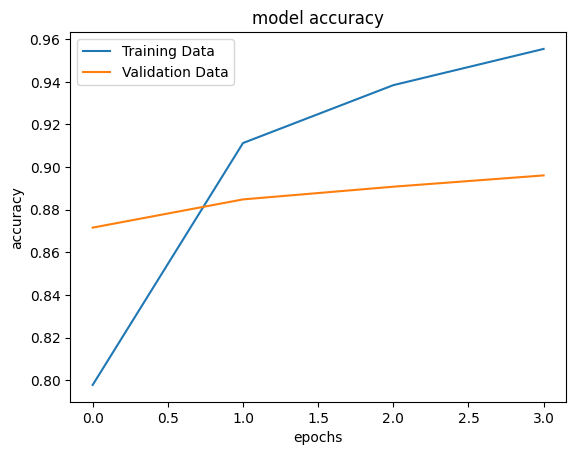

In [67]:
plotting(history,"accuracy")

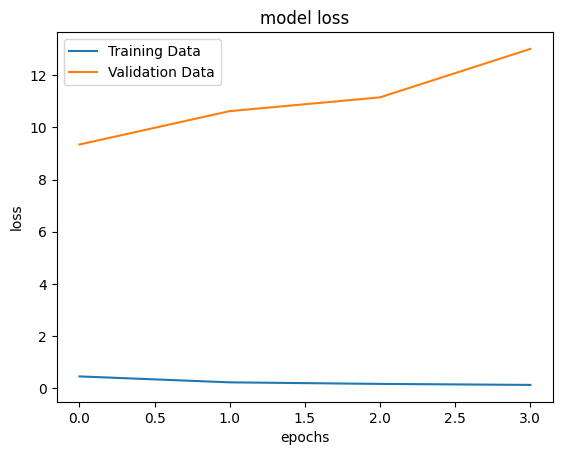

In [68]:
plotting(history,"loss")

In [47]:
##predictions on the validation and test data

In [69]:
# Load model from .h5 file
model_h5 = keras.models.load_model('model.h5')

In [70]:
# Load model from .pkl file
with open('model.pkl', 'rb') as f:
    model_pkl = pickle.load(f)

In [71]:
# Make predictions using the model loaded from .h5 file
val_predictions_h5 = model_h5.predict(x_val_scaled)
test_predictions_h5 = model_h5.predict(x_test_scaled)

48/48 [==============================] - 0s 4ms/step


In [72]:
# Make predictions using the model loaded from .pkl file
val_predictions_pkl = model_pkl.predict(x_val_scaled)
test_predictions_pkl = model_pkl.predict(x_test_scaled)

48/48 [==============================] - 0s 7ms/step


In [53]:
# # Set a threshold for classification
# threshold = 0.5

# # Thresholding predictions for both .h5 and .pkl loaded models
# test_predictions_h5_class = (test_predictions_h5 > threshold).astype(int)
# test_predictions_pkl_class = (test_predictions_pkl > threshold).astype(int)

# # Example of decision making based on predictions
# def interpret_predictions(predictions):
#     if predictions == 1:
#         return "With Mask"
#     else:
#         return "Without Mask"

# # Example of interpreting predictions for a few test images
# for i in range(len(test_predictions_h5_class)):
#     prediction_h5 = test_predictions_h5_class[i][0]
#     prediction_pkl = test_predictions_pkl_class[i][0]
#     print(f"Prediction for image {i+1} (H5 model): {interpret_predictions(prediction_h5)}")
#     print(f"Prediction for image {i+1} (Pickle model): {interpret_predictions(prediction_pkl)}")


In [73]:
from PIL import Image

# Define a function to make predictions on a single image
def predict_single_image(image_path, model):
    # Load the image
    img = Image.open(image_path)
    # Resize and preprocess the image
    img = img.resize((128, 128))
    img = np.array(img) / 255.0  # Normalization
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make prediction using the provided model
    prediction = model.predict(img)

    # Thresholding prediction
    threshold = 0.5
    prediction_class = (prediction > threshold).astype(int)

    # Interpret prediction
    if prediction_class == 1:
        return "With Mask"
    else:
        return "Without Mask"

# Example of making predictions on specific images
image_paths = ["/content/data/with_mask/with_mask_10.jpg","/content/data/with_mask/with_mask_1.jpg", "/content/data/with_mask/with_mask_100.jpg", "/content/data/without_mask/without_mask_1.jpg"]

for image_path in image_paths:
    # Make predictions using the .h5 loaded model
    prediction_h5 = predict_single_image(image_path, model_h5)
    # Make predictions using the .pkl loaded model
    # prediction_pkl = predict_single_image(image_path, model_pkl)

    print(f"Prediction for {image_path} (H5 model): {prediction_h5}")
    # print(f"Prediction for {image_path} (Pickle model): {prediction_pkl}")


1/1 [==============================] - 0s 17ms/step
Prediction for /content/data/with_mask/with_mask_10.jpg (H5 model): With Mask
1/1 [==============================] - 0s 17ms/step
Prediction for /content/data/with_mask/with_mask_1.jpg (H5 model): With Mask
1/1 [==============================] - 0s 17ms/step
Prediction for /content/data/with_mask/with_mask_100.jpg (H5 model): With Mask
1/1 [==============================] - 0s 19ms/step
Prediction for /content/data/without_mask/without_mask_1.jpg (H5 model): Without Mask
